In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy import stats
from scipy.stats import linregress
from config import weather_api_key
#from config import g_key
from citipy import citipy
import csv as atlantic_working


In [2]:
# Import API key
from config import weather_api_key

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [4]:
awdf = pd.read_csv('hurdatawdates.csv')

In [7]:
df1 = awdf.copy()
df1

,ID,Name,Date,Year,Month,Day,Time,Event,Status,Latitude,...,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Max_Wind,group,Storms
0,AL022004,BONNIE,20040809,2004,8,9,1200,,Tropical Storm,22.5,...,0,0,0,0,0,0,0,40.2773,LS,TS
1,AL022004,BONNIE,20040809,2004,8,9,1800,,Tropical Storm,22.9,...,0,0,0,0,0,0,0,46.0312,LS,TS
2,AL022004,BONNIE,20040810,2004,8,10,0,,Tropical Storm,23.1,...,0,0,0,0,0,0,0,51.7851,LS,TS
3,AL022004,BONNIE,20040810,2004,8,10,600,,Tropical Storm,23.4,...,0,0,0,0,0,0,0,51.7851,LS,TS
4,AL022004,BONNIE,20040810,2004,8,10,1200,,Tropical Storm,24.0,...,15,15,15,0,0,0,0,57.5390,HU,LS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,AL102013,INGRID,20130916,2013,9,16,1200,,Tropical Storm,23.7,...,20,0,0,0,0,0,0,63.2929,HU,LS
295,AL122013,KAREN,20131003,2013,10,3,1200,,Tropical Storm,22.1,...,20,0,40,0,0,0,0,63.2929,HU,LS
296,AL122013,KAREN,20131003,2013,10,3,1800,,Tropical Storm,22.8,...,40,0,40,0,0,0,0,63.2929,HU,LS
297,AL122013,KAREN,20131003,2013,10,3,2100,P,Tropical Storm,23.3,...,40,0,40,0,0,0,0,63.2929,HU,LS


In [9]:
# #set "city center" for Houston
# Houston_lat = 29.756097853207656
# Houston_lng = -95.3669907972107

# #calculate greater Houston area by expanding lat and lng
# lat = np.random.uniform(Houston_lat-1, Houston_lat+2, size=6500)
# lng = np.random.uniform(Houston_lng-5, Houston_lng+2, size=6500)

In [10]:
filtered_lat_lng = df1[(df1["Latitude"]<=29) & (df1["Latitude"]>=18) & (df1["Longitude"]>=-100) & (df1["Longitude"]<=-83)]
filtered_lat_lng.head(50)

,ID,Name,Date,Year,Month,Day,Time,Event,Status,Latitude,...,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Max_Wind,group,Storms
0,AL022004,BONNIE,20040809,2004,8,9,1200,,Tropical Storm,22.5,...,0,0,0,0,0,0,0,40.2773,LS,TS
1,AL022004,BONNIE,20040809,2004,8,9,1800,,Tropical Storm,22.9,...,0,0,0,0,0,0,0,46.0312,LS,TS
2,AL022004,BONNIE,20040810,2004,8,10,0,,Tropical Storm,23.1,...,0,0,0,0,0,0,0,51.7851,LS,TS
3,AL022004,BONNIE,20040810,2004,8,10,600,,Tropical Storm,23.4,...,0,0,0,0,0,0,0,51.7851,LS,TS
4,AL022004,BONNIE,20040810,2004,8,10,1200,,Tropical Storm,24.0,...,15,15,15,0,0,0,0,57.5390,HU,LS
5,AL022004,BONNIE,20040810,2004,8,10,1800,,Tropical Storm,24.4,...,0,0,0,0,0,0,0,51.7851,LS,TS
6,AL022004,BONNIE,20040811,2004,8,11,0,,Tropical Storm,24.7,...,0,0,0,0,0,0,0,46.0312,LS,TS
7,AL022004,BONNIE,20040811,2004,8,11,600,,Tropical Storm,25.2,...,0,0,0,0,0,0,0,46.0312,LS,TS
8,AL022004,BONNIE,20040811,2004,8,11,1200,,Tropical Storm,25.7,...,0,0,0,0,0,0,0,51.7851,LS,TS
9,AL022004,BONNIE,20040811,2004,8,11,1800,,Tropical Storm,26.4,...,15,15,15,0,0,0,0,63.2929,HU,LS


In [11]:
filt_df=filtered_lat_lng.rename(columns={"Minimum PreLow Intensity Subtropical Cycloneure":"Minimum Pressure"})

In [12]:
filt_df

,ID,Name,Date,Year,Month,Day,Time,Event,Status,Latitude,...,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Max_Wind,group,Storms
0,AL022004,BONNIE,20040809,2004,8,9,1200,,Tropical Storm,22.5,...,0,0,0,0,0,0,0,40.2773,LS,TS
1,AL022004,BONNIE,20040809,2004,8,9,1800,,Tropical Storm,22.9,...,0,0,0,0,0,0,0,46.0312,LS,TS
2,AL022004,BONNIE,20040810,2004,8,10,0,,Tropical Storm,23.1,...,0,0,0,0,0,0,0,51.7851,LS,TS
3,AL022004,BONNIE,20040810,2004,8,10,600,,Tropical Storm,23.4,...,0,0,0,0,0,0,0,51.7851,LS,TS
4,AL022004,BONNIE,20040810,2004,8,10,1200,,Tropical Storm,24.0,...,15,15,15,0,0,0,0,57.5390,HU,LS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,AL102013,INGRID,20130916,2013,9,16,1200,,Tropical Storm,23.7,...,20,0,0,0,0,0,0,63.2929,HU,LS
295,AL122013,KAREN,20131003,2013,10,3,1200,,Tropical Storm,22.1,...,20,0,40,0,0,0,0,63.2929,HU,LS
296,AL122013,KAREN,20131003,2013,10,3,1800,,Tropical Storm,22.8,...,40,0,40,0,0,0,0,63.2929,HU,LS
297,AL122013,KAREN,20131003,2013,10,3,2100,P,Tropical Storm,23.3,...,40,0,40,0,0,0,0,63.2929,HU,LS


In [13]:
filt_df2 = filt_df[(filt_df["Minimum Pressure"]>=0)]
filt_df2

,ID,Name,Date,Year,Month,Day,Time,Event,Status,Latitude,...,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Max_Wind,group,Storms
0,AL022004,BONNIE,20040809,2004,8,9,1200,,Tropical Storm,22.5,...,0,0,0,0,0,0,0,40.2773,LS,TS
1,AL022004,BONNIE,20040809,2004,8,9,1800,,Tropical Storm,22.9,...,0,0,0,0,0,0,0,46.0312,LS,TS
2,AL022004,BONNIE,20040810,2004,8,10,0,,Tropical Storm,23.1,...,0,0,0,0,0,0,0,51.7851,LS,TS
3,AL022004,BONNIE,20040810,2004,8,10,600,,Tropical Storm,23.4,...,0,0,0,0,0,0,0,51.7851,LS,TS
4,AL022004,BONNIE,20040810,2004,8,10,1200,,Tropical Storm,24.0,...,15,15,15,0,0,0,0,57.5390,HU,LS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,AL102013,INGRID,20130916,2013,9,16,1200,,Tropical Storm,23.7,...,20,0,0,0,0,0,0,63.2929,HU,LS
295,AL122013,KAREN,20131003,2013,10,3,1200,,Tropical Storm,22.1,...,20,0,40,0,0,0,0,63.2929,HU,LS
296,AL122013,KAREN,20131003,2013,10,3,1800,,Tropical Storm,22.8,...,40,0,40,0,0,0,0,63.2929,HU,LS
297,AL122013,KAREN,20131003,2013,10,3,2100,P,Tropical Storm,23.3,...,40,0,40,0,0,0,0,63.2929,HU,LS


In [14]:
def knots_to_mph(x):
     return x*1.15078

filt_df2["Max_Wind"]=filt_df2["Maximum Wind"].apply(knots_to_mph)

In [15]:
data_df = filt_df2.drop(columns="Maximum Wind")

In [16]:
data_df

,ID,Name,Date,Year,Month,Day,Time,Event,Status,Latitude,...,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Max_Wind,group,Storms
0,AL022004,BONNIE,20040809,2004,8,9,1200,,Tropical Storm,22.5,...,0,0,0,0,0,0,0,40.2773,LS,TS
1,AL022004,BONNIE,20040809,2004,8,9,1800,,Tropical Storm,22.9,...,0,0,0,0,0,0,0,46.0312,LS,TS
2,AL022004,BONNIE,20040810,2004,8,10,0,,Tropical Storm,23.1,...,0,0,0,0,0,0,0,51.7851,LS,TS
3,AL022004,BONNIE,20040810,2004,8,10,600,,Tropical Storm,23.4,...,0,0,0,0,0,0,0,51.7851,LS,TS
4,AL022004,BONNIE,20040810,2004,8,10,1200,,Tropical Storm,24.0,...,15,15,15,0,0,0,0,57.5390,HU,LS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,AL102013,INGRID,20130916,2013,9,16,1200,,Tropical Storm,23.7,...,20,0,0,0,0,0,0,63.2929,HU,LS
295,AL122013,KAREN,20131003,2013,10,3,1200,,Tropical Storm,22.1,...,20,0,40,0,0,0,0,63.2929,HU,LS
296,AL122013,KAREN,20131003,2013,10,3,1800,,Tropical Storm,22.8,...,40,0,40,0,0,0,0,63.2929,HU,LS
297,AL122013,KAREN,20131003,2013,10,3,2100,P,Tropical Storm,23.3,...,40,0,40,0,0,0,0,63.2929,HU,LS


In [17]:
#data_df.set_index(inplace = False)
data_df

,ID,Name,Date,Year,Month,Day,Time,Event,Status,Latitude,...,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Max_Wind,group,Storms
0,AL022004,BONNIE,20040809,2004,8,9,1200,,Tropical Storm,22.5,...,0,0,0,0,0,0,0,40.2773,LS,TS
1,AL022004,BONNIE,20040809,2004,8,9,1800,,Tropical Storm,22.9,...,0,0,0,0,0,0,0,46.0312,LS,TS
2,AL022004,BONNIE,20040810,2004,8,10,0,,Tropical Storm,23.1,...,0,0,0,0,0,0,0,51.7851,LS,TS
3,AL022004,BONNIE,20040810,2004,8,10,600,,Tropical Storm,23.4,...,0,0,0,0,0,0,0,51.7851,LS,TS
4,AL022004,BONNIE,20040810,2004,8,10,1200,,Tropical Storm,24.0,...,15,15,15,0,0,0,0,57.5390,HU,LS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,AL102013,INGRID,20130916,2013,9,16,1200,,Tropical Storm,23.7,...,20,0,0,0,0,0,0,63.2929,HU,LS
295,AL122013,KAREN,20131003,2013,10,3,1200,,Tropical Storm,22.1,...,20,0,40,0,0,0,0,63.2929,HU,LS
296,AL122013,KAREN,20131003,2013,10,3,1800,,Tropical Storm,22.8,...,40,0,40,0,0,0,0,63.2929,HU,LS
297,AL122013,KAREN,20131003,2013,10,3,2100,P,Tropical Storm,23.3,...,40,0,40,0,0,0,0,63.2929,HU,LS


In [18]:
#Storm ID belonging to the Low wind category(Monthly) 
low_wind = data_df.loc[(data_df["Low Wind NE"]>0)&(data_df["Low Wind SE"]>0)&(data_df["Low Wind SW"]>0)&(data_df["Low Wind NW"]>0),:]
low_wind["Low_wind_avg"] = (low_wind["Low Wind NE"]+low_wind["Low Wind SE"]+low_wind["Low Wind SW"]+low_wind["Low Wind NW"])/4
#low_wind

In [32]:
low_month_grp = low_wind.groupby(["Month","ID"]).mean()["Low_wind_avg"]
low_month_df = low_month_grp.to_frame()
low_month_df.sort_values(["Month","ID"],ascending=True)
low_month_df.reset_index(inplace=True)
#low_month_df

,Month,ID,Low_wind_avg
0,6,AL012006,82.500000
1,6,AL012010,82.734375
2,6,AL012011,77.500000
3,6,AL012013,80.000000
4,6,AL022005,28.333333
5,6,AL022007,52.500000
6,6,AL022013,43.125000
7,6,AL042012,132.250000
8,7,AL012010,137.812500
9,7,AL032005,68.750000


In [20]:
mode_wind = data_df[(data_df["Moderate Wind NE"]>0)&(data_df["Moderate Wind SE"]>0)&(data_df["Moderate Wind SW"]>0)&(data_df["Moderate Wind NW"]>0)]
mode_wind["Mode_wind_avg"] = (mode_wind["Moderate Wind NE"]+mode_wind["Moderate Wind SE"]+mode_wind["Moderate Wind SW"]+mode_wind["Moderate Wind NW"])/4

C:\Users\George\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
#Storm ID belonging to the Moderate wind category(Monthly) 
mode_month_grp = mode_wind.groupby(["Month","ID"]).mean()["Mode_wind_avg"]
mode_month_df = mode_month_grp.to_frame()
mode_month_df
mode_month_df.sort_values(["Month","ID"],ascending=True)
mode_month_df.reset_index(inplace=True)
#mode_year_df

In [23]:
high_wind = data_df[(data_df["High Wind NE"]>0)&(data_df["High Wind SE"]>0)&(data_df["High Wind SW"]>0)&(data_df["High Wind NW"]>0)]
high_wind["High_wind_avg"] = (high_wind["High Wind NE"]+high_wind["High Wind SE"]+high_wind["High Wind SW"]+high_wind["High Wind NW"])/4

C:\Users\George\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
#Storm ID belonging to the High wind category(Monthly) 
high_month_grp = high_wind.groupby(["Month","ID"]).mean()["High_wind_avg"]
high_month_df = high_month_grp.to_frame()
high_month_df
high_month_df.sort_values(["Month","ID"],ascending=True)
high_month_df.reset_index(inplace=True)
#high_year_df

In [25]:
%matplotlib inline

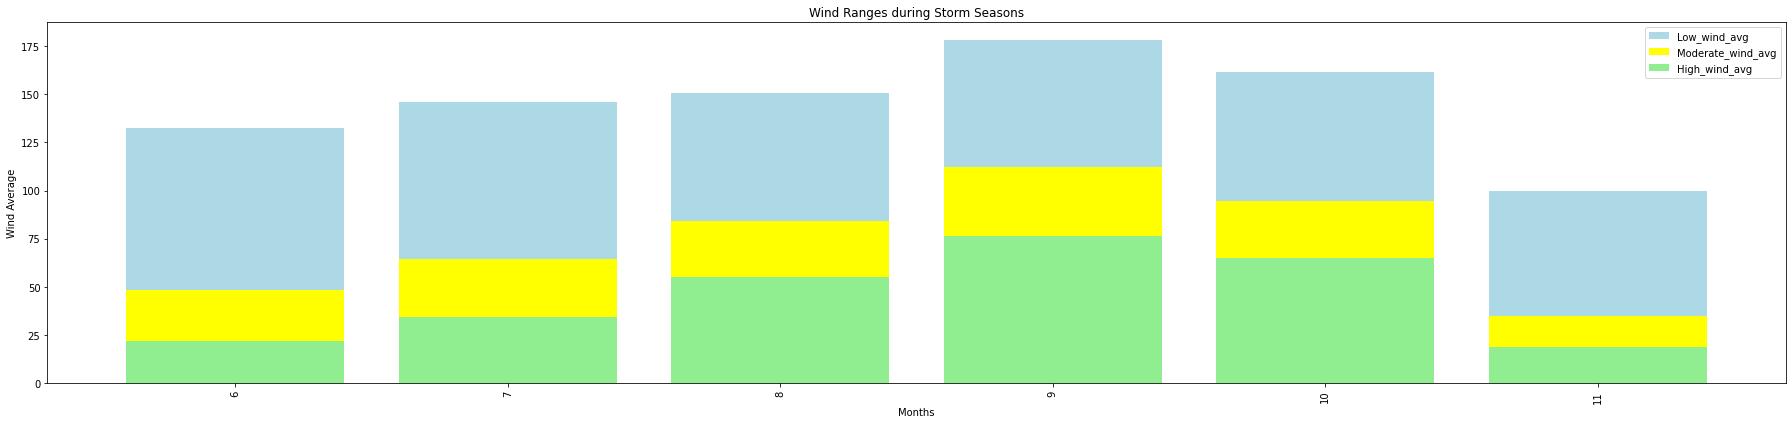

In [26]:
plt.figure(figsize=(25,6))
x_axis=low_month_df["Month"]
y_axis=low_month_df["Low_wind_avg"]
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, ["June","July","August","September","October","November"])
ax = plt.bar(x_axis,y_axis,color="lightblue")

x1_axis=mode_month_df["Month"]
y1_axis=mode_month_df["Mode_wind_avg"]
plt.bar(x1_axis,y1_axis,color="yellow")

x2_axis=high_month_df["Month"]
y2_axis=high_month_df["High_wind_avg"]
plt.bar(x2_axis,y2_axis,color='lightgreen')


plt.xticks(rotation=90)
plt.title("Wind Ranges during Storm Seasons")
plt.xlabel("Months")
plt.ylabel("Wind Average")
plt.legend(["Low_wind_avg","Moderate_wind_avg","High_wind_avg"],loc="upper right")
plt.tight_layout()

output_file = "CSV_Output/Images/WindRanges_barplot.png"
plt.savefig(output_file)
plt.show()

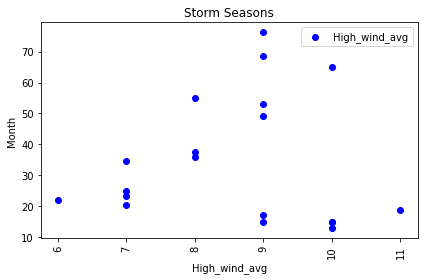

In [27]:
plt.scatter(x2_axis,y2_axis,color="blue")


plt.xticks(rotation=90)
plt.title("Storm Seasons")
plt.xlabel('High_wind_avg')
plt.ylabel('Month')
plt.legend(["High_wind_avg"],loc="upper right")
plt.tight_layout()


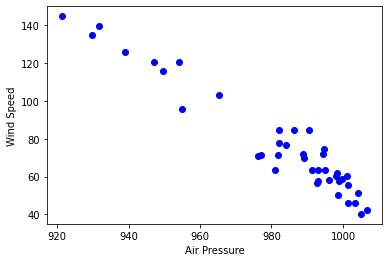

In [28]:
x_values = data_df.groupby("ID").mean()["Minimum Pressure"]
y_values = data_df.groupby("ID").mean()["Max_Wind"]

plt.scatter(x_values,y_values,color="blue")
plt.xlabel('Air Pressure')
plt.ylabel('Wind Speed')

plt.show()

In [29]:
#data_df.columns

In [30]:
storm_cat = data_df.loc[data_df["group"]==data_df["Storms"],:]
storm_cat[["Year","Storms"]]
storm_cat

,ID,Name,Date,Year,Month,Day,Time,Event,Status,Latitude,...,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Max_Wind,group,Storms
14,AL092004,IVAN,20040913,2004,9,13,600,,Hurricane,19.9,...,90,60,75,90,75,40,50,161.1092,HU,HU
15,AL092004,IVAN,20040913,2004,9,13,1200,,Hurricane,20.4,...,90,60,75,90,75,40,50,161.1092,HU,HU
16,AL092004,IVAN,20040913,2004,9,13,1800,,Hurricane,20.9,...,110,90,100,100,85,70,75,161.1092,HU,HU
17,AL092004,IVAN,20040914,2004,9,14,0,,Hurricane,21.6,...,110,70,100,85,85,50,75,161.1092,HU,HU
18,AL092004,IVAN,20040914,2004,9,14,600,,Hurricane,22.4,...,110,70,100,85,85,50,75,161.1092,HU,HU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,AL102013,INGRID,20130915,2013,9,15,0,,Hurricane,21.6,...,30,20,30,30,0,0,20,86.3085,HU,HU
288,AL102013,INGRID,20130915,2013,9,15,600,,Hurricane,22.0,...,20,20,30,30,0,0,20,86.3085,HU,HU
289,AL102013,INGRID,20130915,2013,9,15,1200,,Hurricane,22.4,...,10,0,30,20,0,0,20,74.8007,HU,HU
290,AL102013,INGRID,20130915,2013,9,15,1800,,Hurricane,22.7,...,10,0,30,20,0,0,0,74.8007,HU,HU


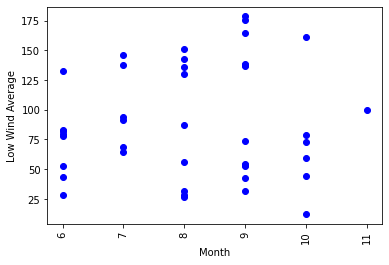

In [47]:
x_axis = low_month_df["Month"]
y_axis = low_month_df["Low_wind_avg"]

plt.scatter(x_axis,y_axis,color="blue")
plt.xlabel('Month')
plt.ylabel('Low Wind Average')


plt.xticks(rotation=90)

plt.show()